# **Data Prepocessing**

In [28]:
#Install Required Libraries
%pip install pandas matplotlib seaborn nltk emoji

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/590.6 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 3.3 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [5]:
#Merge the datasets and add a column to differentiate between AI sources
file_list = ["claude.csv", "deepseek.csv", "gemini.csv", "gpt.csv", "grok.csv", "perplexity.csv"]
df_list = []
for file in file_list:
    df = pd.read_csv(file)
    df['Source'] = file
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

display(merged_df.shape)
display(df.info())
merged_df.sample(frac=1).head(10)

(130885, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12484 entries, 0 to 12483
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Comment     12483 non-null  object
 1   At          12484 non-null  object
 2   AppVersion  11321 non-null  object
 3   Sentiment   12484 non-null  int64 
 4   Source      12484 non-null  object
dtypes: int64(1), object(4)
memory usage: 487.8+ KB


None

,Comment,At,AppVersion,Sentiment,Source
27007,literally cant do anything 💀💀💀,2024-06-08 22:11:06,1.0.626720042,0,gemini.csv
32208,is FAST ENOUGH,2025-02-21 02:30:39,1.0.686588308,2,gemini.csv
104971,super,2025-06-30 15:46:39,0.5.25,2,grok.csv
99798,grok is the best option thank grok,2025-04-11 05:52:15,0.3.11,2,grok.csv
38261,ok,2025-07-01 03:41:58,1.0.686588308,1,gemini.csv
1912,"AWFUL APP, KEEPS BANNING ME FOR NO REASON, ABS...",2025-05-13 16:47:18,1.250407.47,0,claude.csv
30362,great help😊👍,2025-04-21 21:11:14,1.0.741105040,2,gemini.csv
37570,Gemini appisbest appisbest,2024-11-20 10:29:15,1.0.686588308,2,gemini.csv
80790,very goofd very free,2025-05-25 20:50:41,1.2025.126,2,gpt.csv
66425,👍,2025-05-21 04:29:32,1.2025.126,0,gpt.csv


In [10]:
display(df.isnull().sum())
print("Percentage of missing values in each column:")
df.isnull().sum()/df.shape[0]*100

Comment          1
At               0
AppVersion    1163
Sentiment        0
Source           0
dtype: int64

Percentage of missing values in each column:


Comment       0.008010
At            0.000000
AppVersion    9.315924
Sentiment     0.000000
Source        0.000000
dtype: float64

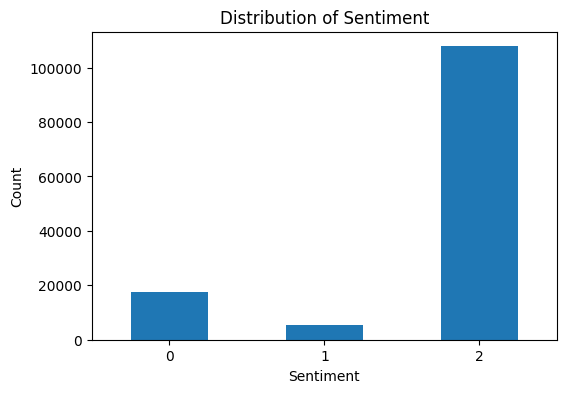

In [11]:
#Distribution of the "Sentiment" column
sentiment_counts = merged_df['Sentiment'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['0', '1', '2'])
plt.show()

 **Date and Time Conversion**

In [12]:
#date and time conversion
merged_df['At'] = pd.to_datetime(merged_df['At'], format='%Y-%m-%d %H:%M:%S')

In [13]:
merged_df = merged_df.rename(columns={'At': 'Timestamp'})

merged_df.info()
display(merged_df.head(10))
merged_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130885 entries, 0 to 130884
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Comment     130880 non-null  object        
 1   Timestamp   130885 non-null  datetime64[ns]
 2   AppVersion  117792 non-null  object        
 3   Sentiment   130885 non-null  int64         
 4   Source      130885 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.0+ MB


,Comment,Timestamp,AppVersion,Sentiment,Source
0,Ridiculous how we are limited when paying!,2025-06-10 21:24:17,1.250609.27,2,claude.csv
1,love this app but would like a download icon t...,2025-04-05 21:24:04,1.250331.7,2,claude.csv
2,perfect AI i can't compare with even Chatgpt t...,2025-05-30 08:17:46,1.250526.17,2,claude.csv
3,"can't access projects directly yet, but still ...",2024-08-17 17:31:07,1.240812.7,2,claude.csv
4,very good app,2025-06-16 18:33:42,1.250602.7,2,claude.csv
5,"it's a absolutely amazing AI, I asked chat GPT...",2025-06-05 05:11:33,1.250602.7,2,claude.csv
6,The best!,2024-08-29 10:40:50,1.240826.27,2,claude.csv
7,slick AF,2024-10-28 13:44:08,1.241021.17,2,claude.csv
8,I shared on my page but was not able to upgrad...,2024-10-19 21:54:37,1.241021.7,2,claude.csv
9,no NSFW,2025-06-03 04:44:19,1.250519.17,0,claude.csv


,Comment,Timestamp,AppVersion,Sentiment,Source
130875,good,2025-06-24 15:26:20,2.47.1,2,perplexity.csv
130876,Redirection from other apps is great,2025-04-20 16:22:08,2.42.0,2,perplexity.csv
130877,Good 👍,2023-07-10 13:32:07,1.0.26,2,perplexity.csv
130878,It is amazing you have there different AU alon...,2025-02-23 12:39:59,NaN,2,perplexity.csv
130879,I think It's the best app there I got to use i...,2024-02-11 14:13:57,2.11.0,2,perplexity.csv
130880,brilliant,2024-10-26 13:33:11,2.31.2,2,perplexity.csv
130881,"Amazing experience, very insightful, loving it",2024-02-03 10:53:13,2.10.0,2,perplexity.csv
130882,"all data from Google and other websites, nothi...",2024-01-14 08:39:02,2.9.0,0,perplexity.csv
130883,"I used several AI platforms, and like them all...",2025-06-28 13:22:14,2.47.0,2,perplexity.csv
130884,excellent,2025-04-17 15:24:27,2.43.1,2,perplexity.csv


**Handling Missing Values**

In [15]:
# Sort by the 'Timestamp' column for forwardfill the missing values
merged_df = merged_df.sort_values(by='Timestamp')

display(merged_df.head(10))
display(merged_df.tail(10))
display(merged_df.isnull().sum())

,Comment,Timestamp,AppVersion,Sentiment,Source
118649,Perplexity became my go to research tool and g...,2023-05-30 16:43:36,1.0.16,2,perplexity.csv
130414,Cool I'm the first rater of this app ❤️,2023-05-30 17:03:25,1.0.16,2,perplexity.csv
128325,Great,2023-05-30 17:11:38,1.0.16,2,perplexity.csv
118796,Finally...my favorite AI chatbot came out for ...,2023-05-30 17:43:26,1.0.16,2,perplexity.csv
125746,Op,2023-05-30 17:49:43,1.0.16,2,perplexity.csv
127159,Love the dark theme and excellent app,2023-05-30 18:01:33,1.0.16,2,perplexity.csv
127708,Has error when trying to sign up with Google.,2023-05-30 18:19:00,1.0.16,2,perplexity.csv
122099,Perplexity AI is an amazing app that has manag...,2023-05-30 18:21:07,1.0.16,2,perplexity.csv
120194,So amazing been waiting for the Android app fo...,2023-05-30 19:00:46,1.0.16,2,perplexity.csv
118864,I have been waiting for this app since forever ♾️,2023-05-30 19:01:26,1.0.16,2,perplexity.csv


,Comment,Timestamp,AppVersion,Sentiment,Source
73114,amazing,2025-07-08 04:38:03,1.2025.182,2,gpt.csv
126789,complete answer,2025-07-08 04:39:59,2.49.3,2,perplexity.csv
70638,I think it's just that I need,2025-07-08 04:48:02,1.2025.182,0,gpt.csv
91688,super,2025-07-08 04:51:55,1.2025.175,2,gpt.csv
70169,best,2025-07-08 04:55:40,1.2025.175,2,gpt.csv
91732,it's good,2025-07-08 04:58:22,1.2025.182,0,gpt.csv
59203,good 👍,2025-07-08 04:59:22,1.2025.168,0,gpt.csv
91188,I love 😘 this,2025-07-08 04:59:45,1.2025.182,2,gpt.csv
42735,This is very good app,2025-07-08 05:00:35,1.0.772404132,2,gemini.csv
59040,It is awsome,2025-07-08 05:05:22,1.2025.182,2,gpt.csv


Comment           5
Timestamp         0
AppVersion    13093
Sentiment         0
Source            0
dtype: int64

In [16]:
# Forward fill missing values in the 'AppVersion' column
#Drop rows with missing 'Comment' values
merged_df['AppVersion'] = merged_df['AppVersion'].ffill()

merged_df = merged_df.dropna(subset=['Comment'])

merged_df.isnull().sum()

Comment       0
Timestamp     0
AppVersion    0
Sentiment     0
Source        0
dtype: int64

In [17]:
#AppVersion Standarization
merged_df = pd.DataFrame(merged_df)

merged_df['AppVersion_Clean'] = merged_df['AppVersion'].astype(str).str.extract(r'(\d+(\.\d+)*)')[0]

merged_df = merged_df.drop('AppVersion', axis=1)

print(merged_df[['AppVersion_Clean']])

       AppVersion_Clean
118649           1.0.16
130414           1.0.16
128325           1.0.16
118796           1.0.16
125746           1.0.16
...                 ...
91732        1.2025.182
59203        1.2025.168
91188        1.2025.182
42735     1.0.772404132
59040        1.2025.182

[130880 rows x 1 columns]


**Lexicon Conversion**

In [22]:
#URLs Removal
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

merged_df['clean'] = merged_df['Comment'].apply(lambda x: remove_urls(str(x)))

merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
57271,good working app,2025-05-16 15:02:54,2,gpt.csv,1.2025.126,good working app
14936,It's not good,2025-01-31 04:25:48,0,deepseek.csv,1.0.7,It's not good
128105,very interesting,2024-03-16 09:26:23,2,perplexity.csv,2.15.0,very interesting
24337,good,2025-05-30 06:33:08,2,gemini.csv,1.0.751104895,good
115807,Grok is outta sight! He / it (?) is actually f...,2025-04-02 01:25:32,2,grok.csv,0.3.4,Grok is outta sight! He / it (?) is actually f...
41919,its not good,2025-05-21 10:53:25,0,gemini.csv,1.0.751104895,its not good
11570,"You should introduce voice assistant early, al...",2025-02-02 06:09:07,2,deepseek.csv,1.0.8,"You should introduce voice assistant early, al..."
36386,love it,2025-02-26 23:06:16,2,gemini.csv,1.0.686588308,love it
26842,For now it's not bad. It has missed a few thin...,2024-11-29 02:37:21,1,gemini.csv,1.0.686588308,For now it's not bad. It has missed a few thin...
65225,Good and respond quickly,2025-05-24 16:39:29,2,gpt.csv,1.2025.133,Good and respond quickly


In [26]:
#HTML tags Removal
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

merged_df['clean'] = merged_df['clean'].apply(remove_html)

merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
1655,Can't even create an account using my main cel...,2024-12-11 05:09:56,0,claude.csv,1.241209.35,Can't even create an account using my main cel...
88505,nice,2025-06-18 01:15:13,2,gpt.csv,1.2025.161,nice
79318,it's really helpful,2025-04-03 17:10:52,2,gpt.csv,1.2025.084,it's really helpful
45039,Terrible voice recignition,2024-09-26 04:38:32,0,gemini.csv,1.0.667532867,Terrible voice recignition
50930,"amazing,apple could never",2025-02-13 19:25:25,2,gemini.csv,1.0.686588308,"amazing,apple could never"
21309,First thing its free of cost,2025-02-02 16:54:14,2,deepseek.csv,1.0.8,First thing its free of cost
5046,I write with Claude 3.5 sonnet. I got prompt t...,2025-03-10 21:18:12,0,claude.csv,1.250224.17,I write with Claude 3.5 sonnet. I got prompt t...
70528,Very good,2025-04-17 08:36:41,2,gpt.csv,1.2025.098,Very good
39343,like Google better,2025-06-22 14:49:15,0,gemini.csv,1.0.751104895,like Google better
125935,✨✨✨✨,2025-06-07 03:08:58,2,perplexity.csv,2.47.0,✨✨✨✨


In [31]:
#Handling Emojis by converting them to text
import emoji

def convert_emojis(text):
    return emoji.demojize(str(text))

merged_df['clean'] = merged_df['clean'].apply(convert_emojis)

merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
54161,great,2024-08-09 21:36:25,2,gemini.csv,1.0.657262185,great
61248,🥰super,2025-06-15 03:13:13,2,gpt.csv,1.2025.154,:smiling_face_with_hearts:super
38866,very good,2024-12-20 15:59:35,2,gemini.csv,1.0.686588308,very good
69771,عالی,2025-05-22 04:04:48,2,gpt.csv,1.2025.126,عالی
69290,it is faster than meta ai and I love it becaus...,2025-05-04 07:10:18,2,gpt.csv,1.2025.084,it is faster than meta ai and I love it becaus...
64697,awesome,2025-06-18 12:33:27,2,gpt.csv,1.2025.154,awesome
6489,Very very very very very very very very very v...,2025-03-04 13:39:34,2,deepseek.csv,1.0.14,Very very very very very very very very very v...
25366,great,2025-06-02 14:30:00,2,gemini.csv,1.0.751104895,great
83336,good,2025-04-28 10:23:13,2,gpt.csv,1.2025.105,good
10369,Please add the voice chat feature in deepseek....,2025-02-02 10:23:36,2,deepseek.csv,1.0.8,Please add the voice chat feature in deepseek....


In [38]:
merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
10197,very innovative and useful tool,2025-05-29 15:50:04,2,deepseek.csv,1.2.1,very innovative and useful tool
72580,best app for photo editing 🙂👍,2025-06-26 11:08:37,2,gpt.csv,1.2025.168,best app for photo editing :slightly_smiling_f...
11488,I can't create an account it won't send me the...,2025-01-28 05:41:52,2,deepseek.csv,1.0.7,I can't create an account it won't send me the...
9743,Good,2025-01-29 10:04:26,2,deepseek.csv,1.0.7,Good
72505,very good app 👌,2025-05-03 03:54:53,0,gpt.csv,1.2025.105,very good app :OK_hand:
120047,the best app for learning,2024-03-04 03:13:54,2,perplexity.csv,2.14.0,the best app for learning
114173,Ecellent app no words to say.,2025-04-01 22:50:57,2,grok.csv,0.3.5,Ecellent app no words to say.
83433,the paid version is too expensive,2025-04-02 18:15:05,0,gpt.csv,1.2025.077,the paid version is too expensive
65593,It is very useful for me,2025-07-03 14:29:21,2,gpt.csv,1.2025.175,It is very useful for me
128642,great,2025-04-22 16:33:17,2,perplexity.csv,2.43.1,great


In [39]:
#Lowercase conversion
merged_df['clean'] = merged_df['clean'].str.lower()
merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
35075,nice 👍,2025-06-21 00:13:28,2,gemini.csv,1.0.751104895,nice :thumbs_up:
126833,no validity,2025-06-22 14:13:32,1,perplexity.csv,2.48.1,no validity
3422,The best AI assistant I have used so far. Thanks,2025-05-31 23:43:13,2,claude.csv,1.2025.140,the best ai assistant i have used so far. thanks
73284,عالیییی,2025-05-06 20:19:15,2,gpt.csv,1.2025.091,عالیییی
109786,Really loving using this offerings by xAi. It ...,2025-03-04 15:13:32,2,grok.csv,0.1.18,really loving using this offerings by xai. it ...
90621,nice,2025-07-04 04:50:51,2,gpt.csv,1.2025.175,nice
71373,nice,2025-07-04 05:32:40,2,gpt.csv,1.2025.154,nice
44892,dont like it,2025-06-09 23:01:19,0,gemini.csv,1.0.751104895,dont like it
33928,best ai after grok and gpt,2025-06-02 03:05:05,2,gemini.csv,1.0.751104895,best ai after grok and gpt
121522,amazing this beat the bard and chat gpt really...,2024-01-14 02:08:42,2,perplexity.csv,2.9.0,amazing this beat the bard and chat gpt really...


In [40]:
# Punctuations Removal
def remove_punctuations(text):
  punctuation = string.punctuation
  return text.translate(str.maketrans("", "", punctuation))

merged_df['clean'] = merged_df['clean'].astype(str).apply(lambda x: remove_punctuations(x))
merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
71586,very nice 👍👍👍👍,2025-05-13 17:31:40,2,gpt.csv,1.2025.126,very nice thumbsupthumbsupthumbsupthumbsup
83905,The app is sooooo slow but I like the cartooni...,2025-04-07 05:44:33,0,gpt.csv,1.2025.084,the app is sooooo slow but i like the cartooni...
101915,💯,2025-04-05 11:58:12,2,grok.csv,0.3.6,hundredpoints
127454,New 🆕,2024-01-15 00:10:24,2,perplexity.csv,2.9.0,new newbutton
9037,Amazing app for all needs ...,2025-02-11 17:24:30,2,deepseek.csv,1.0.9,amazing app for all needs
111111,nice app,2025-03-31 01:30:29,2,grok.csv,0.3.3,nice app
23231,Disable this nonsense!,2025-05-16 03:11:34,0,gemini.csv,1.0.667532867,disable this nonsense
77869,great app for assistance to virtually everything,2025-05-22 05:47:50,2,gpt.csv,1.2025.126,great app for assistance to virtually everything
53333,good good,2025-04-05 09:30:00,2,gemini.csv,1.0.686588308,good good
78494,❤️‍🔥,2025-05-30 08:06:11,2,gpt.csv,1.2025.140,heartonfire


In [41]:
#Tokenization
from nltk.tokenize import word_tokenize

merged_df['clean'] = merged_df['clean'].apply(word_tokenize)
merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
112389,nice 👍,2025-03-30 14:15:34,2,grok.csv,0.3.2,"[nice, thumbsup]"
2897,Claude is the best. Gives the best advice and ...,2025-05-08 14:26:48,2,claude.csv,1.250505.27,"[claude, is, the, best, gives, the, best, advi..."
87619,exllent,2025-04-19 15:23:35,2,gpt.csv,1.2025.098,[exllent]
83363,good,2025-06-11 10:34:26,2,gpt.csv,1.2025.147,[good]
5868,Super,2025-03-20 00:53:21,2,claude.csv,1.250317.17,[super]
29099,Best app,2024-11-28 12:59:54,2,gemini.csv,1.0.686588308,"[best, app]"
100692,exclent work🤣,2025-03-31 12:56:32,2,grok.csv,0.3.3,"[exclent, workrollingonthefloorlaughing]"
8730,I will remove this app and come back when you ...,2025-01-29 14:11:20,0,deepseek.csv,1.0.8,"[i, will, remove, this, app, and, come, back, ..."
47685,good,2025-05-19 17:16:19,2,gemini.csv,1.0.751104895,[good]
12948,بہت ہی زبردست ناقابل یقین,2025-02-02 19:13:04,2,deepseek.csv,1.0.8,"[بہت, ہی, زبردست, ناقابل, یقین]"


In [42]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words_list(word_list):
    if isinstance(word_list, list):
        return " ".join([stemmer.stem(word) for word in word_list])
    else:
        return word_list

In [43]:
# Apply stemming to the 'clean' column using the updated function
merged_df['stemmed_text'] = merged_df['clean'].apply(lambda x: stem_words_list(x))

In [44]:
merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean,stemmed_text
18743,Its very fast .. it really answer your qyestio...,2025-02-05 12:00:55,2,deepseek.csv,1.0.8,"[its, very, fast, it, really, answer, your, qy...",it veri fast it realli answer your qyestion li...
71720,good,2025-05-21 12:46:43,2,gpt.csv,1.2025.133,[good],good
62508,all in one best ai,2025-07-01 09:56:06,2,gpt.csv,1.2025.175,"[all, in, one, best, ai]",all in one best ai
114602,nice,2025-04-09 04:36:01,2,grok.csv,0.3.9,[nice],nice
23068,Absolutely mind boggling just how far AI's ski...,2024-09-02 14:49:59,2,gemini.csv,1.0.662093464,"[absolutely, mind, boggling, just, how, far, a...",absolut mind boggl just how far ai skillset ha...
122139,this is very excellent the best once it comes ...,2024-08-08 10:59:30,2,perplexity.csv,2.25.1,"[this, is, very, excellent, the, best, once, i...",thi is veri excel the best onc it come to acad...
27001,good,2025-01-28 16:22:25,2,gemini.csv,1.0.686588308,[good],good
79155,best ai app,2025-05-26 05:32:03,2,gpt.csv,1.2025.140,"[best, ai, app]",best ai app
82619,lol when i login error appear,2025-04-06 08:01:27,0,gpt.csv,1.2025.084,"[lol, when, i, login, error, appear]",lol when i login error appear
22085,best ❤️,2025-02-03 19:52:19,2,deepseek.csv,1.0.8,"[best, redheart]",best redheart


In [45]:
#Lemmatization & POS Tagging
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words_list(word_list):
    if isinstance(word_list, list):
        pos_tagged = pos_tag(word_list)
        return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged])
    else:
        return word_list

merged_df['lemmatized_text'] = merged_df['clean'].apply(lambda x: lemmatize_words_list(x))

merged_df.sample(frac=1).head(10)
#takes about 66s to run

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean,stemmed_text,lemmatized_text
101540,EXCELLENT WORKING. FAR BETTER THAN ANYBOTHER C...,2025-03-17 18:24:09,2,grok.csv,0.2.6,"[excellent, working, far, better, than, anybot...",excel work far better than anyboth chatbot ava...,excellent work far good than anybother chatbot...
101001,this app is so interesting 😁,2025-03-31 05:02:18,2,grok.csv,0.3.3,"[this, app, is, so, interesting, beamingfacewi...",thi app is so interest beamingfacewithsmilingey,this app be so interesting beamingfacewithsmil...
108945,me pahli baar kisi app ko 5 star rating de rha hu,2025-03-27 10:13:43,2,grok.csv,0.3.2,"[me, pahli, baar, kisi, app, ko, 5, star, rati...",me pahli baar kisi app ko 5 star rate de rha hu,me pahli baar kisi app ko 5 star rating de rha hu
20460,Very good and amazing value compared to altern...,2025-01-27 16:31:00,2,deepseek.csv,1.0.7,"[very, good, and, amazing, value, compared, to...",veri good and amaz valu compar to altern make ...,very good and amazing value compare to alterna...
108819,Amazing for just about everything i need it fo...,2025-05-06 15:09:39,2,grok.csv,0.4.15,"[amazing, for, just, about, everything, i, nee...",amaz for just about everyth i need it for ty xai,amaze for just about everything i need it for ...
68368,this is a vari nice app,2025-05-14 08:29:07,2,gpt.csv,1.2025.105,"[this, is, a, vari, nice, app]",thi is a vari nice app,this be a vari nice app
34347,very useful.,2025-06-30 08:44:01,2,gemini.csv,1.0.772404132,"[very, useful]",veri use,very useful
32141,Worest app Display only hindi language We have...,2024-07-29 14:52:30,0,gemini.csv,1.0.626720042,"[worest, app, display, only, hindi, language, ...",worest app display onli hindi languag we have ...,worest app display only hindi language we have...
121443,Perfect,2024-09-12 22:13:25,2,perplexity.csv,2.28.1,[perfect],perfect,perfect
24702,It is the best app by google,2024-12-07 11:16:06,2,gemini.csv,1.0.686588308,"[it, is, the, best, app, by, google]",it is the best app by googl,it be the best app by google


In [46]:
display(merged_df[['Comment', 'lemmatized_text']].sample(frac=1).head(10))

,Comment,lemmatized_text
10689,very nice app,very nice app
33470,ok,ok
75256,😍,smilingfacewithhearteyes
45699,good,good
29992,good,good
52764,perfect,perfect
94720,Darun,darun
81353,ধন্যবাদ,ধন্যবাদ
206,this is very useful app ☺️☺️☺️☺️☺️,this be very useful app smilingfacesmilingface...
57735,nice,nice


# **Model Training**

In [ ]:
%pip install transformers torch scikit-learn datasets
#takes 10mins to run

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.3 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.3 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.3 MB 2.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.3 MB 2.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.3 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.3 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.3 MB 3.0 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.3 MB 3.0 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.3 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.3 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.3 MB 2.6 MB/s eta 0:00:02
   ---